In [1]:
import pandas as pd

LISTING_ENRICHED_FILE = "./scraped/working/listings_data_enriched.csv"
LISTING_BASIC_FILE = "./scraped/working/listings_data_basic.csv"
LISTING_JSON_MODEL_FILE = "./scraped/working/listings_data_jsonmodel.csv"
LISTING_JSON_META_FILE = "./scraped/working/listings_data_jsonmeta.csv"

df_listing = pd.read_csv(LISTING_BASIC_FILE)
df_indiv = pd.read_csv(LISTING_ENRICHED_FILE)
df_json = pd.read_csv(LISTING_JSON_MODEL_FILE)
combined_listing_indiv_df = df_listing.merge(df_indiv, on='ids', how='inner', suffixes=('_indiv', '_listing'))
combined_listing_indiv_df.head(20)

,ids,Links,Address,Description,Price,version_indiv,borough,referencing_link,add_info,date_scraped_indiv,...,bedrooms,bathrooms,size,other_key_info,bullet_points,station_info,hold_type,short_description,long_description,date_scraped_listing
0,124098623,https://www.rightmove.co.uk/properties/1240986...,"Steele Road, London, W4",1 bedroom flat for sale,495000.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,"Added on 20/06/2022 by Whitman & Co, Chiswick",2022-06-23 17:32:59,...,1.0,1.0,483 sq. ft.;(45 sq. m.),NaN,Newly refurbished period conversion flat;South...,"[(0.2, 'South Acton Station', 'svg-overground'...",NaN,svg-camera=10;;svg-floorplan=1;;Read more,"A newly refurbished, stylishly presented perio...",2022-06-23 17:41:56
1,118297238,https://www.rightmove.co.uk/properties/1182972...,"Welford House, Waxlow Way, Northolt, UB5",2 bedroom flat for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,"Added on 04/01/2022 by Rolfe East, Greenford",2022-06-23 17:33:08,...,2.0,2.0,NaN,NaN,Two double bedrooms;Master bedroom with ensuit...,"[(1.5, 'Northolt Station', 'svg-underground'),...",NaN,UNDER OFFER;;svg-camera=10;;svg-virtual-tour=1...,"This spacious third floor, two bedroom purpose...",2022-06-23 17:40:59
2,84010074,https://www.rightmove.co.uk/properties/8401007...,"Research House, Fraser Road, Perivale, UB6",1 bedroom apartment for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,"Added on 22/02/2022 by Homesforth, London",2022-06-23 17:33:08,...,1.0,1.0,NaN,NaN,NaN,"[(0.4, 'Perivale Station', 'svg-underground'),...",NaN,svg-camera=11;;Read more,This stunning one bedroom apartment benefits f...,2022-06-23 17:40:14
3,122314532,https://www.rightmove.co.uk/properties/1223145...,"Western Avenue, Greenford, UB6",1 bedroom apartment for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,"Reduced on 04/05/2022 by Purplebricks, coverin...",2022-06-23 17:33:16,...,1.0,1.0,NaN,NaN,2Nd Floor Apartment;High Quality Finish Throug...,"[(0.3, 'Perivale Station', 'svg-underground'),...",NaN,svg-camera=11;;svg-floorplan=1;;Read more,The Property Purplebricks are excited to intro...,2022-06-23 17:39:33
4,68590443,https://www.rightmove.co.uk/properties/6859044...,"The Avenue, Ealing",1 bedroom apartment for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,Added on 22/02/2020 by Colin Bibra Estate Agen...,2022-06-23 17:33:22,...,1.0,1.0,NaN,NaN,One bedroom;Bathroom & W.C.;Lounge;Equipped ki...,"[(0.1, 'West Ealing Station', 'svg-nationalrai...",NaN,svg-camera=5;;Read more,A spacious first floor purpose built flat s...,2022-06-23 17:37:51
5,119874695,https://www.rightmove.co.uk/properties/1198746...,"Cubitt Square, Southall",2 bedroom apartment for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,"Reduced on 18/03/2022 by Sinton Andrews, Hanwell",2022-06-23 17:33:25,...,2.0,1.0,558 sq. ft.;(52 sq. m.),NaN,First Floor Apartment;Two Bedrooms;Excellent C...,"[(0.9, 'Hanwell Station', 'svg-nationalrail'),...",NaN,SOLD STC;;svg-camera=13;;svg-floorplan=1;;Read...,This two bedroom property is located on the...,2022-06-23 17:37:05
6,119194598,https://www.rightmove.co.uk/properties/1191945...,"Dormers Wells Lane, Southall",2 bedroom apartment for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,"Added on 26/01/2022 by Parkfields Estates, Sou...",2022-06-23 17:33:38,...,2.0,1.0,NaN,NaN,GROUND FLOOR MAISONETTE;NEW LEASE (125 YEARS);...,"[(0.9, 'Southall Station', 'svg-nationalrail')...",NaN,SOLD STC;;svg-camera=5;;svg-floorplan=1;;Read ...,A GROUND FLOOR MAISONETTE LOCATED JUST OFF UXB...,2022-06-23 17:35:54
7,119102450,https://www.rightmove.co.uk/properties/1191024...,"East Acton Lane, Acton",1 bedroom flat for s

In [93]:
print(combined_listing_indiv_df.shape)
combined_listing_indiv_df['sq_ft'] = combined_listing_indiv_df["size"].str.extract("(\d*) sq. ft.")
combined_listing_indiv_df = combined_listing_indiv_df.dropna(subset = ['sq_ft'])
combined_listing_indiv_df['sq_ft'] = combined_listing_indiv_df['sq_ft'].astype(float)
print(combined_listing_indiv_df.shape)

combined_listing_indiv_df.info()

(8118, 24)
(1254, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 8110
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ids                   1254 non-null   int64  
 1   Links                 1254 non-null   object 
 2   Address               1254 non-null   object 
 3   Description           1254 non-null   object 
 4   Price                 1254 non-null   object 
 5   version_indiv         1254 non-null   object 
 6   borough               1243 non-null   object 
 7   referencing_link      838 non-null    object 
 8   add_info              838 non-null    object 
 9   date_scraped_indiv    838 non-null    object 
 10  version_listing       1254 non-null   object 
 11  link                  1254 non-null   object 
 12  Station_Prox          1254 non-null   float64
 13  type                  1247 non-null   object 
 14  bedrooms              1164 non-null   float64
 15 

In [94]:
selected_columns = ['bedrooms','bathrooms','sq_ft','Station_Prox','Price']
df_selected = combined_listing_indiv_df[selected_columns]
df_selected

,bedrooms,bathrooms,sq_ft,Station_Prox,Price
0,1.0,1.0,483.0,0.2,495000.0
5,2.0,1.0,558.0,0.9,299950.0
12,1.0,1.0,397.0,0.1,300000.0
28,1.0,1.0,507.0,0.3,295000.0
39,1.0,NaN,417.0,0.3,298160.0
...,...,...,...,...,...
8023,1.0,1.0,477.0,0.1,375000.0
8033,2.0,2.0,802.0,0.8,550000.0
8089,1.0,2.0,624.0,0.3,375000.0
8108,4.0,2.0,496.0,0.3,610000.0


In [95]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 8110
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      1164 non-null   float64
 1   bathrooms     1175 non-null   float64
 2   sq_ft         1254 non-null   float64
 3   Station_Prox  1254 non-null   float64
 4   Price         1254 non-null   object 
dtypes: float64(4), object(1)
memory usage: 58.8+ KB


In [96]:
print(df_selected.shape)
df_selected = df_selected[df_selected["Price"] != 'POA']
df_selected = df_selected[df_selected["Price"] != 'POA']
df_selected = df_selected.dropna() # LinearRegression does not accept missing values encoded as NaN natively.
df_selected['Price'] = df_selected['Price'].astype('float')
print(df_selected.shape)
df_selected.info()

(1254, 5)
(1097, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 0 to 8110
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      1097 non-null   float64
 1   bathrooms     1097 non-null   float64
 2   sq_ft         1097 non-null   float64
 3   Station_Prox  1097 non-null   float64
 4   Price         1097 non-null   float64
dtypes: float64(5)
memory usage: 51.4 KB


In [97]:
X = df_selected[selected_columns].drop('Price',axis=1).values
y = df_selected["Price"].values
X.shape, y.shape

((1097, 4), (1097,))

In [98]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [99]:
print(linreg.intercept_, linreg.coef_)

-516440.0339727077 [ 1.18077354e+05  6.91079944e+05 -1.40819903e+01 -5.84484695e+04]


In [100]:
print(linreg.score(X,y))

0.4470646387049315


## Using Seaborn

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

%matplotlib inline
rcParams['figure.figsize'] = 5,4
rcParams['figure.figsize'] = 10,8

In [102]:
import seaborn as sns
sns.set_style('whitegrid')

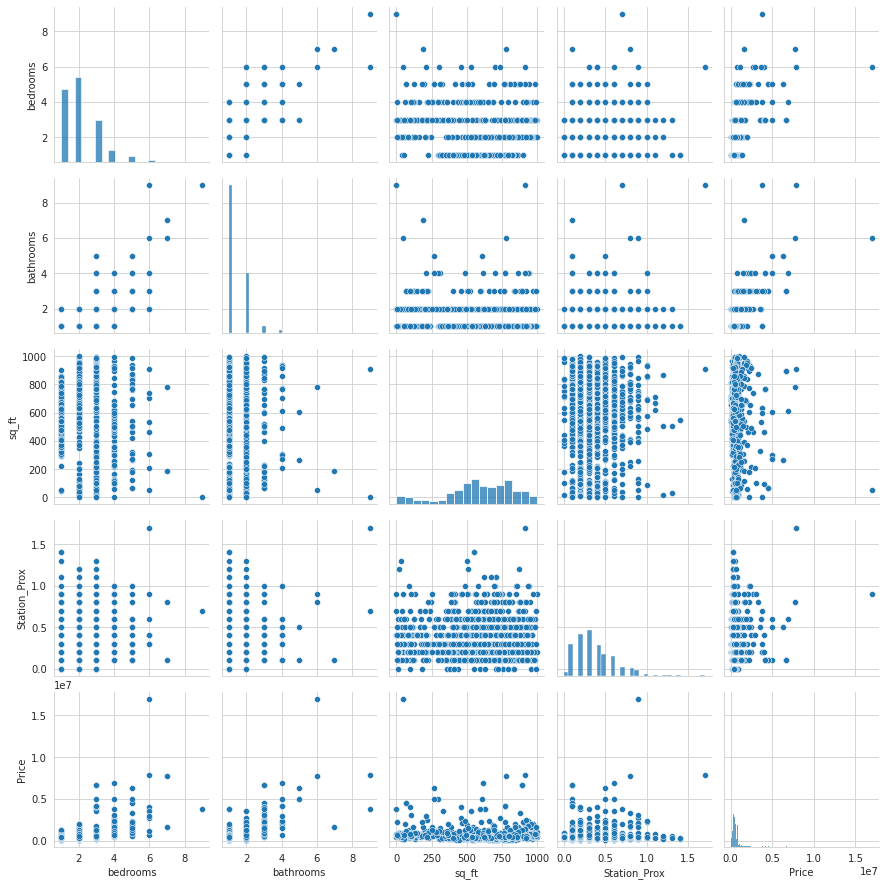

In [103]:
sns.pairplot(df_selected)

In [104]:
df_selected.describe()

,bedrooms,bathrooms,sq_ft,Station_Prox,Price
count,1097.000000,1097.000000,1097.000000,1097.000000,1.097000e+03
mean,2.084777,1.418414,583.520510,0.371103,6.800547e+05
std,1.080313,0.764726,242.174154,0.235092,9.261544e+05
min,1.000000,1.000000,0.000000,0.000000,8.875000e+04
25%,1.000000,1.000000,460.000000,0.200000,3.250000e+05
50%,2.000000,1.000000,605.000000,0.300000,4.500000e+05
75%,3.000000,2.000000,770.000000,0.500000,7.700000e+05
max,9.000000,9.000000,999.000000,1.700000,1.700000e+07


In [105]:
df_selected.corr()

,bedrooms,bathrooms,sq_ft,Station_Prox,Price
bedrooms,1.000000,0.661643,-0.054532,0.131083,0.513538
bathrooms,0.661643,1.000000,-0.055770,0.089138,0.660637
sq_ft,-0.054532,-0.055770,1.000000,0.018834,-0.043296
Station_Prox,0.131083,0.089138,0.018834,1.000000,0.054013
Price,0.513538,0.660637,-0.043296,0.054013,1.000000


In [108]:
df_json['id'] = df_json['id'].astype(int)
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   id                                                  2317 non-null   int64  
 1   keyFeatures                                         2317 non-null   object 
 2   images                                              2317 non-null   object 
 3   floorplans                                          2317 non-null   object 
 4   virtualTours                                        2317 non-null   object 
 5   industryAffiliations                                2317 non-null   object 
 6   rooms                                               2317 non-null   object 
 7   nearestAirports                                     2317 non-null   object 
 8   nearestStations                                     2317 non-null   object 
 9

In [109]:
combined3_df = df_listing.merge(df_indiv, on='ids', how='inner', suffixes=('_indiv', '_listing'))\
                        .merge(df_json, left_on='ids', right_on='id', how='inner', suffixes=('_indiv', '_listing'))
combined3_df.head(20)

,ids,Links,Address,Description,Price,version_indiv,borough,referencing_link,add_info,date_scraped_indiv,...,sharedOwnership.rentPrice,sharedOwnership.rentFrequency,livingCosts.councilTaxExempt,livingCosts.councilTaxIncluded,livingCosts.annualGroundRent,livingCosts.groundRentReviewPeriodInYears,livingCosts.groundRentPercentageIncrease,livingCosts.annualServiceCharge,livingCosts.councilTaxBand,livingCosts.domesticRates
0,124098623,https://www.rightmove.co.uk/properties/1240986...,"Steele Road, London, W4",1 bedroom flat for sale,495000.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,"Added on 20/06/2022 by Whitman & Co, Chiswick",2022-06-23 17:32:59,...,NaN,not specified,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,118297238,https://www.rightmove.co.uk/properties/1182972...,"Welford House, Waxlow Way, Northolt, UB5",2 bedroom flat for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,"Added on 04/01/2022 by Rolfe East, Greenford",2022-06-23 17:33:08,...,NaN,not specified,False,False,NaN,NaN,NaN,NaN,D,NaN
2,84010074,https://www.rightmove.co.uk/properties/8401007...,"Research House, Fraser Road, Perivale, UB6",1 bedroom apartment for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,"Added on 22/02/2022 by Homesforth, London",2022-06-23 17:33:08,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,122314532,https://www.rightmove.co.uk/properties/1223145...,"Western Avenue, Greenford, UB6",1 bedroom apartment for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,"Reduced on 04/05/2022 by Purplebricks, coverin...",2022-06-23 17:33:16,...,NaN,not specified,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,68590443,https://www.rightmove.co.uk/properties/6859044...,"The Avenue, Ealing",1 bedroom apartment for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,Added on 22/02/2020 by Colin Bibra Estate Agen...,2022-06-23 17:33:22,...,NaN,not specified,False,False,NaN,NaN,NaN,NaN,NaN,NaN
5,119874695,https://www.rightmove.co.uk/properties/1198746...,"Cubitt Square, Southall",2 bedroom apartment for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,"Reduced on 18/03/2022 by Sinton Andrews, Hanwell",2022-06-23 17:33:25,...,NaN,not specified,False,False,NaN,NaN,NaN,NaN,NaN,NaN
6,119194598,https://www.rightmove.co.uk/properties/1191945...,"Dormers Wells Lane, Southall",2 bedroom apartment for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,"Added on 26/01/2022 by Parkfields Estates, Sou...",2022-06-23 17:33:38,...,NaN,not specified,False,False,NaN,NaN,NaN,NaN,NaN,NaN
7,119102450,https://www.rightmove.co.uk/properties/1191024...,"East Acton Lane, Acton",1 bedroom flat for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,Added on 24/01/2022 by Kinleigh Folkard & Hayw...,2022-06-23 17:33:41,...,NaN,not specified,False,False,NaN,NaN,NaN,NaN,NaN,NaN
8,119489600,https://www.rightmove.co.uk/properties/1194896...,"The Ridings, Ealing",1 bedroom flat for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,Reduced on 11/03/2022 by Robertson Smith & Kem...,2022-06-23 17:33:52,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
9,119337302,https://www.rightmove.co.uk/properties/1193373...,"Glebe Court, Church Road, W7",2 bedroom apartment for sale,299950.0,v0021_220622,"('Ealing', '5E93947')",https://www.rightmove.co.uk/property-for-sale/...,Reduced on 28/02/2022 by Doyle Sales & Letting...,2022-06-23 17:33:52,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
combined3_df.info()
combined3_df.columns
combined3_df.head(5)

SyntaxError: invalid syntax (3930298538.py, line 3)

In [113]:
combined3_df.describe()

,ids,Station_Prox,bedrooms_indiv,bathrooms_indiv,id,countryGuide,bedrooms_listing,bathrooms_listing,feesApply,lettings,...,location.circleRadiusOnMap,misInfo.branchId,contactInfo.telephoneNumbers.internationalNumber,contactInfo.telephoneNumbers.disclaimerText,contactInfo.telephoneNumbers.disclaimerTitle,tenure.yearsRemainingOnLease,sharedOwnership.ownershipPercentage,livingCosts.groundRentPercentageIncrease,livingCosts.annualServiceCharge,livingCosts.domesticRates
count,2.479000e+03,2479.000000,2301.000000,2307.000000,2.479000e+03,0.0,2301.000000,2307.000000,0.0,0.0,...,2479.000000,2477.000000,0.0,0.0,0.0,144.000000,0.0,0.0,6.000000,0.0
mean,1.124414e+08,0.451351,1.845285,1.174252,1.124414e+08,NaN,1.845285,1.174252,NaN,NaN,...,0.012102,77775.668147,NaN,NaN,NaN,279.000000,NaN,NaN,1014.785000,NaN
std,1.484297e+07,0.483010,0.856413,0.405914,1.484297e+07,NaN,0.856413,0.405914,NaN,NaN,...,0.425971,73626.638323,NaN,NaN,NaN,333.668945,NaN,NaN,627.495763,NaN
min,4.902067e+07,0.000000,1.000000,1.000000,4.902067e+07,NaN,1.000000,1.000000,NaN,NaN,...,0.000000,349.000000,NaN,NaN,NaN,0.000000,NaN,NaN,60.000000,NaN
25%,1.097649e+08,0.200000,1.000000,1.000000,1.097649e+08,NaN,1.000000,1.000000,NaN,NaN,...,0.000000,14743.000000,NaN,NaN,NaN,99.750000,NaN,NaN,759.660000,NaN
50%,1.194952e+08,0.300000,2.000000,1.000000,1.194952e+08,NaN,2.000000,1.000000,NaN,NaN,...,0.000000,53189.000000,NaN,NaN,NaN,124.500000,NaN,NaN,1006.135000,NaN
75%,1.226191e+08,0.600000,2.000000,1.000000,1.226191e+08,NaN,2.000000,1.000000,NaN,NaN,...,0.000000,100426.000000,NaN,NaN,NaN,245.000000,NaN,NaN,1330.737500,NaN
max,1.242432e+08,12.900000,8.000000,4.000000,1.242432e+08,NaN,8.000000,4.000000,NaN,NaN,...,15.000000,248612.000000,NaN,NaN,NaN,999.000000,NaN,NaN,1900.000000,NaN
